In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Source: Data Source :http://data.seoul.go.kr/
SOUTH KOREA PUBLIC HOLIDAYS. URL: publicholidays.go.kr

# Linear Regression Supervised Learning
Assumption :

    - Linearity -> Data following a linear pattern

    - Independance -> All the sample point should be independant and not rely to one another 

    - Normality -> The residual plot should have values normaly distributed  
    
    - Homoskedacity ->  Our variance (the spread) of the points should remain close to constant

Evaluating Linear Regression error methods : 

    1) Mean Absolute Error (MAE) :  Sum ( | y_actual - y_pred| ) / num_of_dataPoints 

    2) Mean Squared Error (MSE) :    Sum ( (y_actual - y_pred )^2 ) / num_of_dataPoints  - Eliminated Large errors 

    3) Root Mean Squared Error (RMSE) : A = Sum ( (y_actual - y_pred )^2 ) / num_of_dataPoints 
    
                                        RMSE = sqrt( A )

    4) R^2 - Coefficient of Determination :  R^2 = 1 - RSS / TSS

                                            RSS - sum of squared residuals = Sum (y_actual - y_pred)^2
                                            
                                            TSS - total sum of squares = Sum (y_actual - y_mean)^2 

In [36]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
# Remove columns that you don't need
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1) # TO run this properly I deleted the degrees symbol inside the csv


In [37]:
df.columns = dataset_cols 
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis = 1)

In [38]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


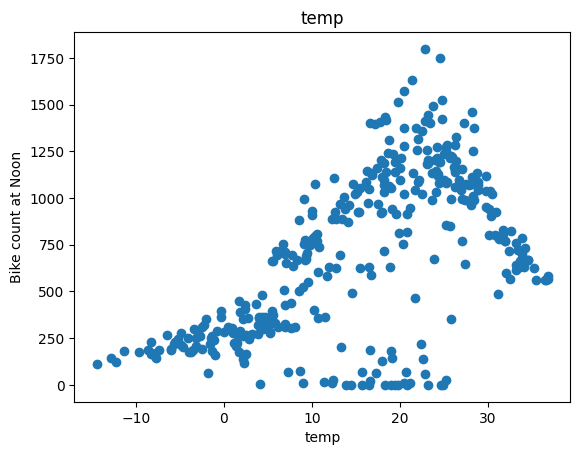

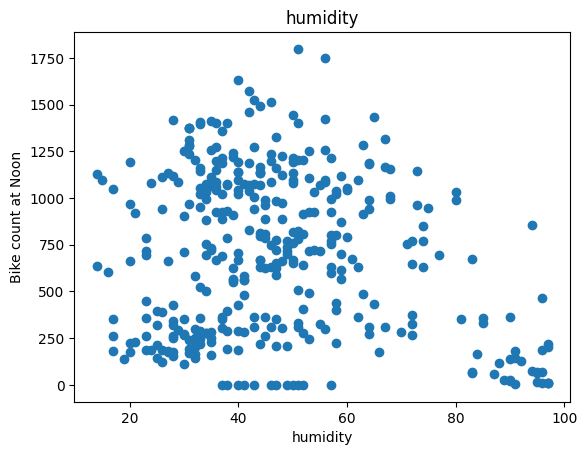

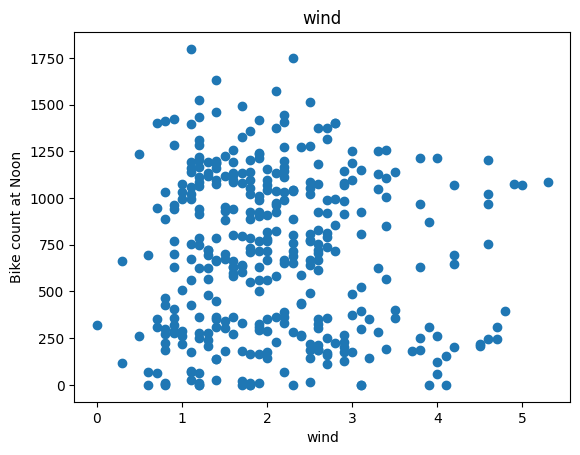

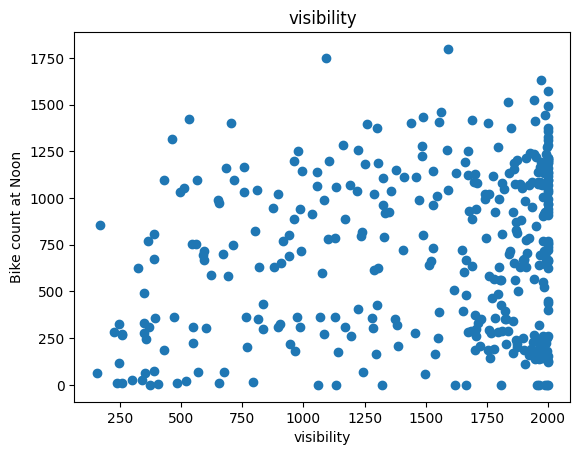

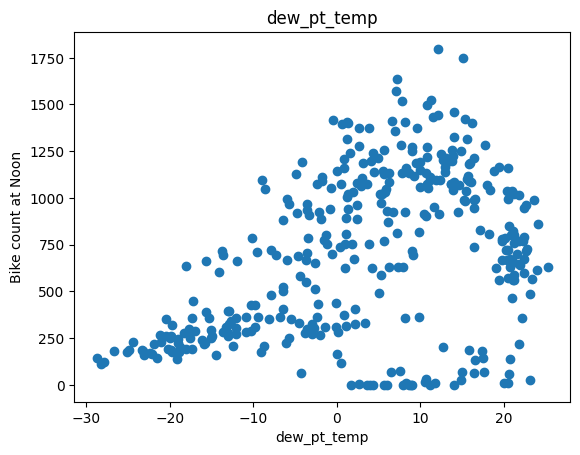

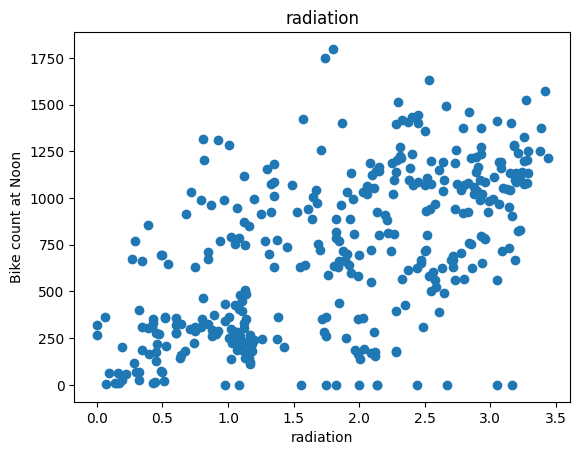

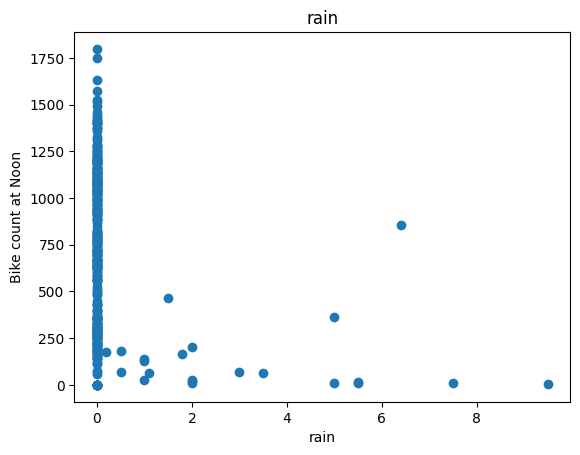

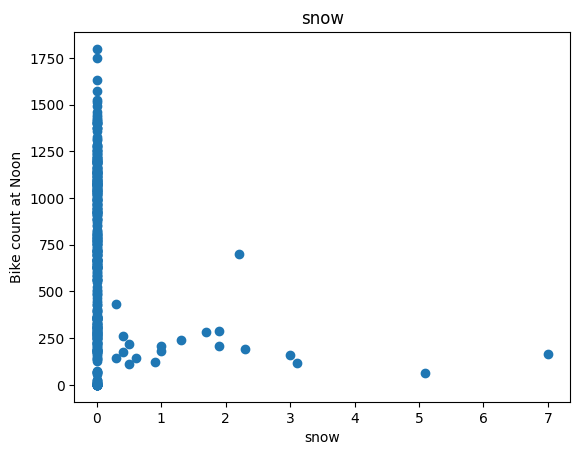

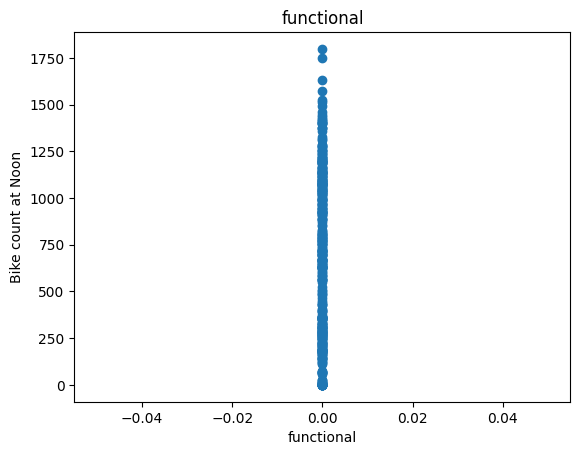

In [19]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike count at Noon")
    plt.xlabel(label)
    plt.show()
    

In [39]:
# Based on the above plots we are dropping out the ones that doesnt matter 
df = df.drop(["wind", "visibility", "functional"], axis = 1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [40]:
# SPlit data 
train, val, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)), int(0.8 * len(df))])

c:\Users\Altair\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [41]:
def get_xy(dataframe, y_label, x_labels = None ):
    
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values
    
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X, y))
    
    return data, X, y

In [42]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels = ["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels = ["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels = ["temp"])

In [43]:
# Create a regeressor

temp_reg = LinearRegression() # Create an object
temp_reg.fit(X_train_temp , y_train_temp)


LinearRegression()

In [44]:
temp_reg.score(X_test_temp, y_test_temp)

0.3723359555119816

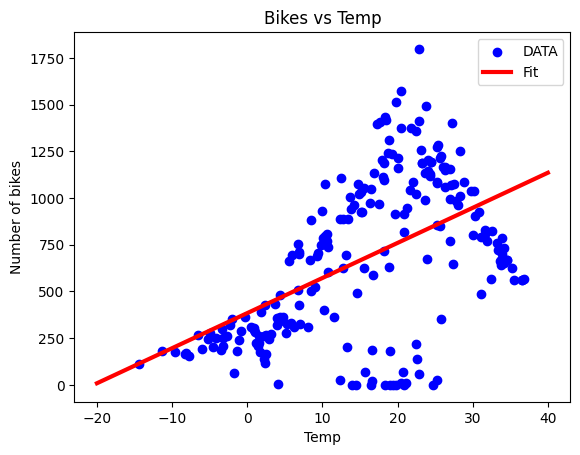

In [45]:
plt.scatter(X_train_temp, y_train_temp, label = "DATA", color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red", linewidth = 3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")

plt.show()

# Multiple Linear REgression

In [47]:
train, val, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)), int(0.8 * len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels = df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels = df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels = df.columns[1:])

c:\Users\Altair\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [48]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)


LinearRegression()

In [49]:
all_reg.score(X_test_all, y_test_all)

0.32770147488781787

# Regression with a Neural Net

In [61]:
def plot_loss(history):
    
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [53]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

c:\Users\Altair\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1) #By choosing one simple node the model becomes linear
])

In [56]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'mean_squared_error')

In [59]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_val_temp, y_val_temp)
)

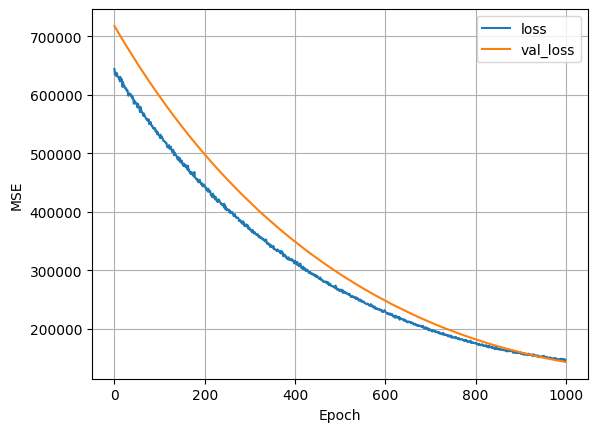

In [62]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step


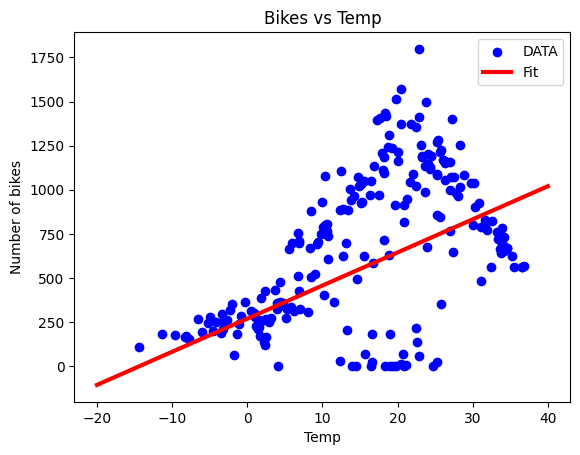

In [63]:
plt.scatter(X_train_temp, y_train_temp, label = "DATA", color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red", linewidth = 3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")

plt.show()

The regression plots are not the same because here we used back - propagation to train

# Neural Net (not only 1 single node)

In [79]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [80]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

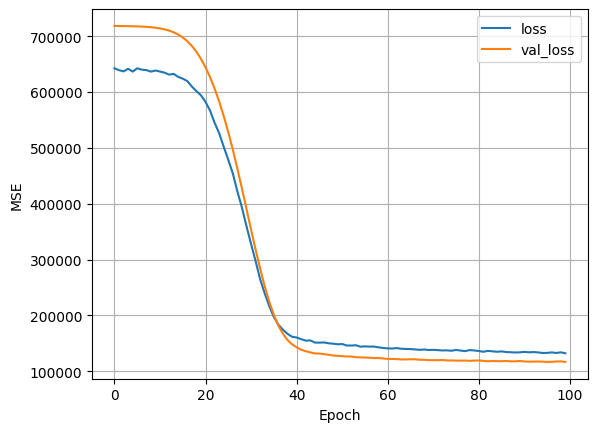

In [81]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


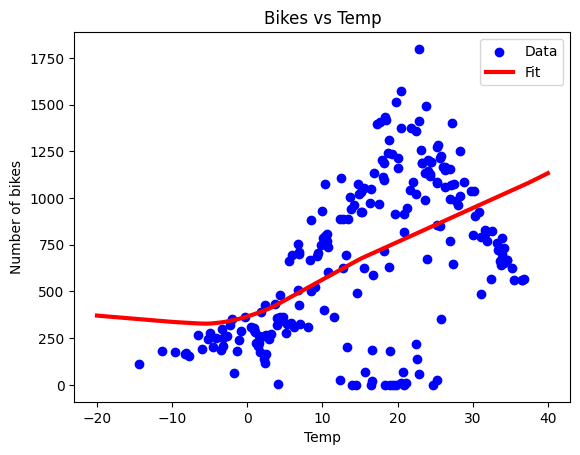

In [83]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [84]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [85]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [86]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

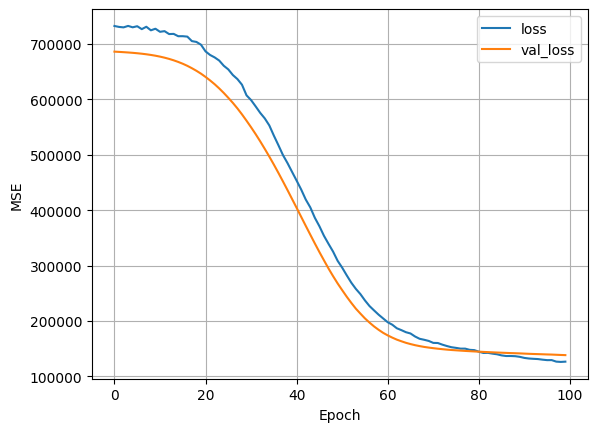

In [87]:
plot_loss(history)

In [88]:
# calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [89]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [90]:
MSE(y_pred_lr, y_test_all)

103081.7643659172

In [91]:
MSE(y_pred_nn, y_test_all)

104941.68479684724

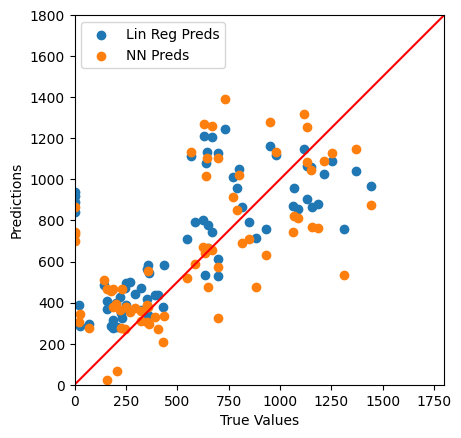

In [92]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")